In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
data= pd.read_csv('/content/retail_sales_dataset (1).csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data.shape

(1000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [ ]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
#adding 'Month' column
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month_name()
data['Month'].head()

0    November
1    February
2     January
3         May
4         May
Name: Month, dtype: object

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.drop(data[data['Total Amount'] < data['Price per Unit']].index, inplace=True)
data.shape

(1000, 10)

Exploratory DATA Analysis


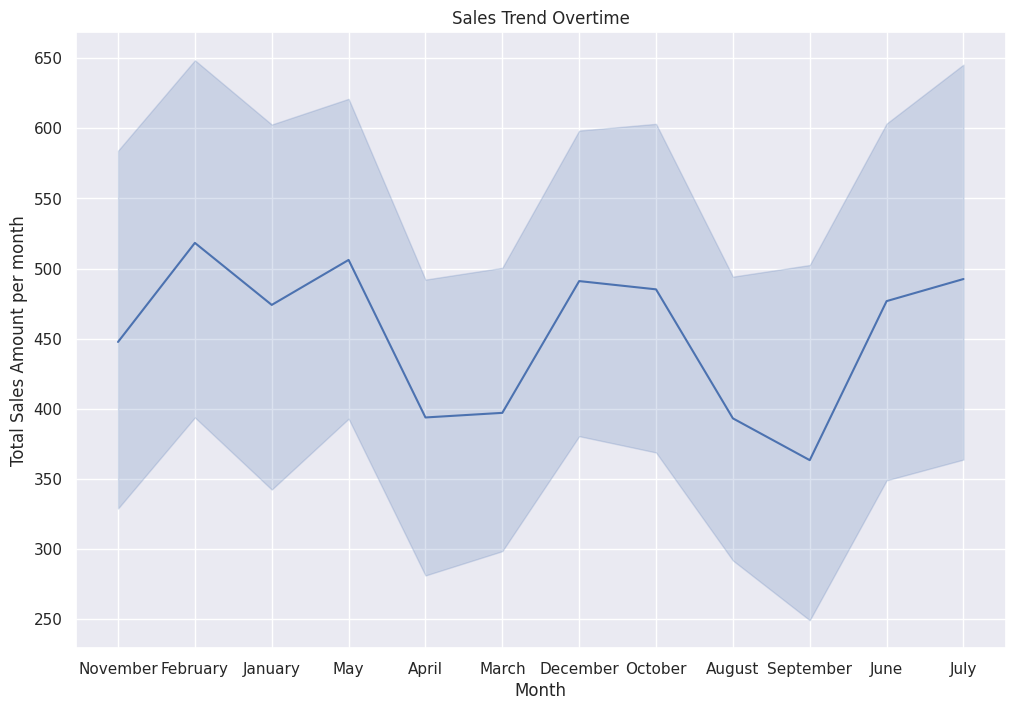

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='Total Amount', data= data)
plt.title('Sales Trend Overtime')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount per month')
plt.show()

In [ ]:
#finding Transaction frequency with month
data['Month'] = data['Date'].dt.month
transaction_count = data.groupby('Month')['Transaction ID'].count()

In [ ]:
transaction_count

Month
1      78
2      85
3      73
4      86
5     105
6      77
7      72
8      94
9      65
10     96
11     78
12     91
Name: Transaction ID, dtype: int64

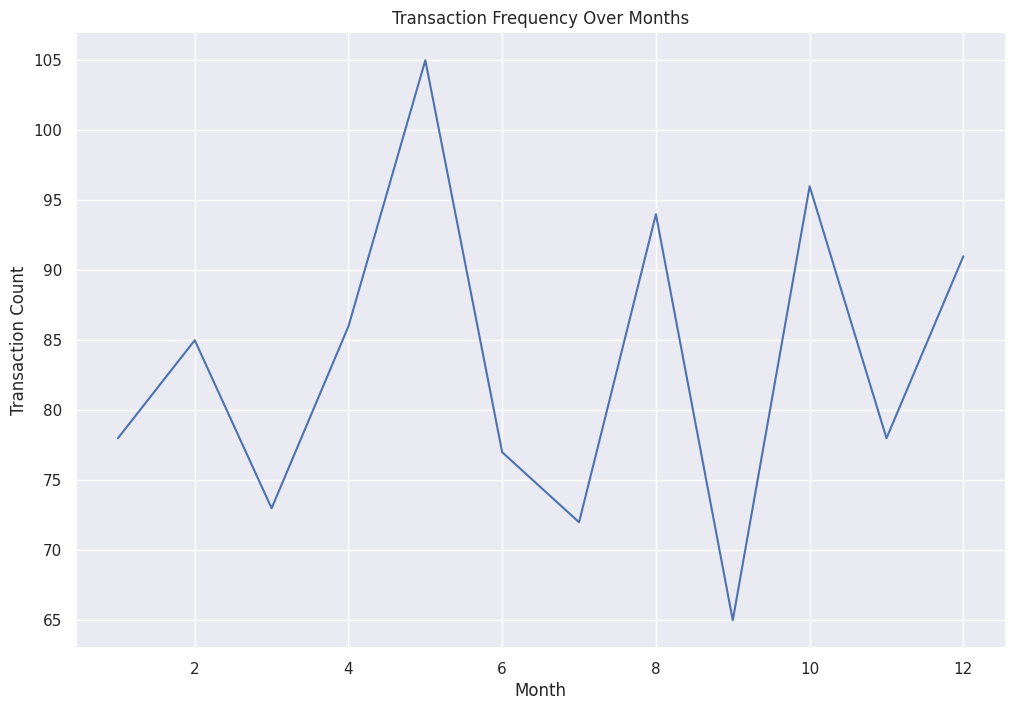

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

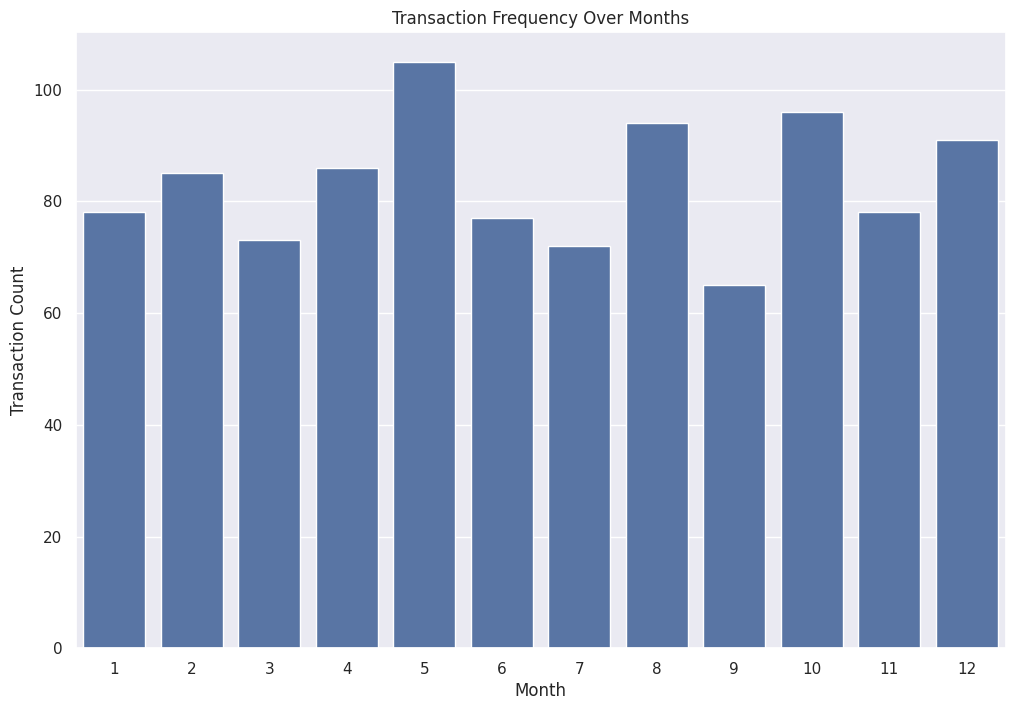

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

In [ ]:
#Sales Of diffrent Product Categories
import plotly.express as px
col = 'Product Category'
i = data[col].value_counts().index
v = data[col].value_counts().values

#pie plot
fig = px.pie(names=i, values=v, height=350,width=700,color=i)
fig.update_layout(paper_bgcolor='#A9DFBF')
fig.update_traces(showlegend=False)
fig.update_layout(title=dict(text=f"Pie Plot of {col}", x=0.5, font=dict(size=25)))
fig.update_traces(textinfo='text+percent+label', textfont_color='white',textfont_size=14)
fig.show()

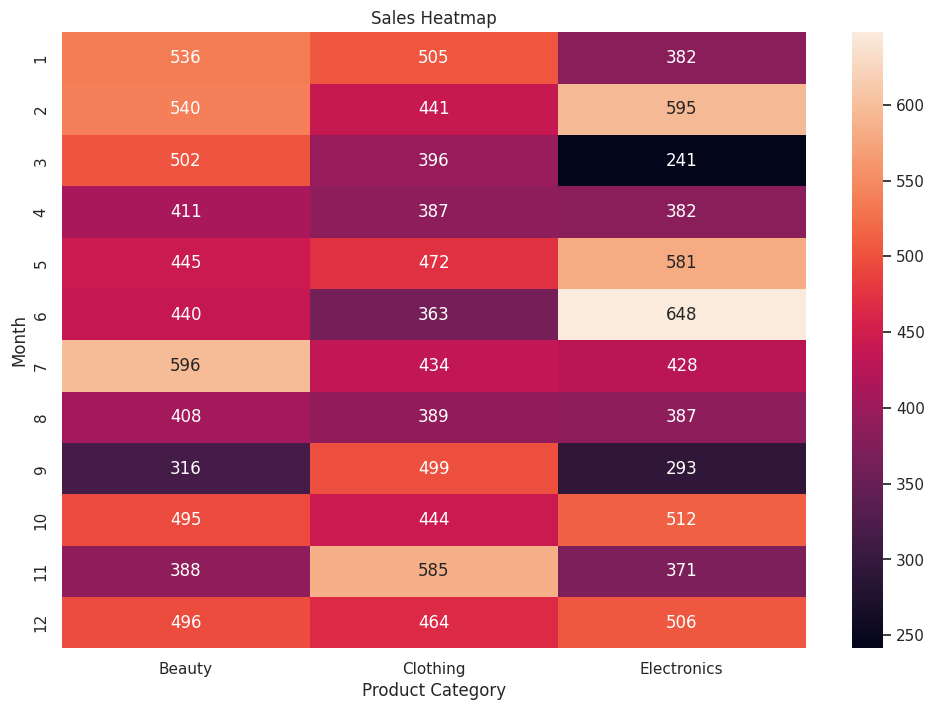

In [ ]:
#Analyzing Sales
heatmap = data.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

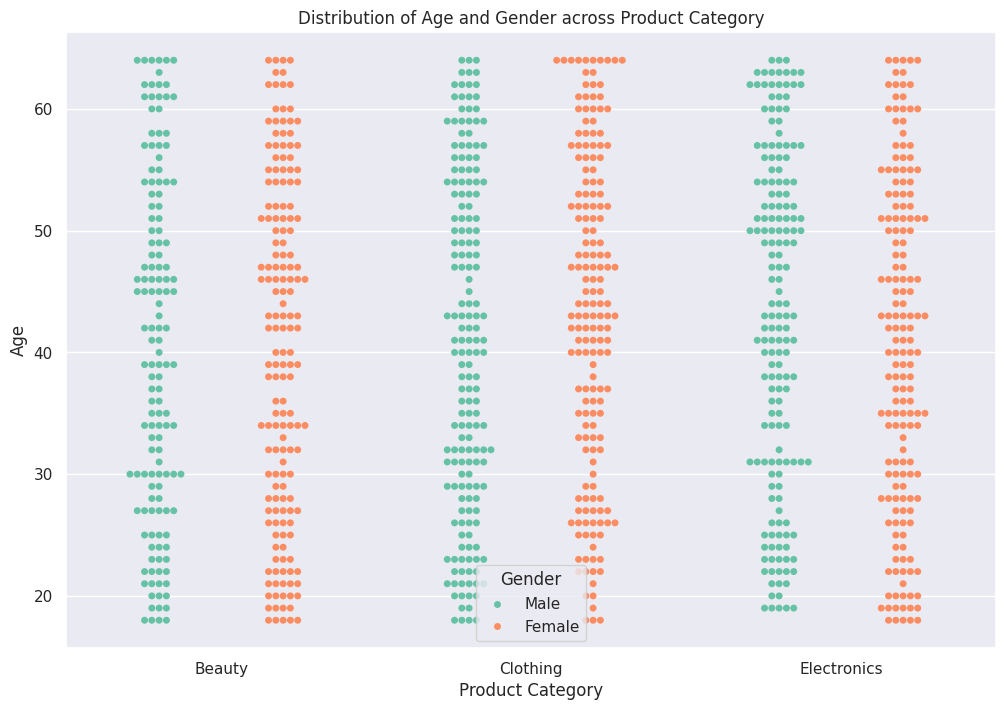

In [ ]:
#Distributing 'Age' and 'Gender' columns across Product Category
plt.figure(figsize=(12,8))
sns.swarmplot(x='Product Category', y='Age', hue='Gender', data=data, palette='Set2', dodge=True)
plt.title('Distribution of Age and Gender across Product Category')
plt.xlabel('Product Category')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

In [ ]:
#Analyzing product quantity purchased by diffrent Age Group
age_bins = [0, 18, 25, 35, 50, 100]
age_group = ['0-18', '19-25', '26-35', '36-50', '50+']
data['Age Group'] = pd.cut(data['Age'], bins = age_bins, labels=age_group)
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


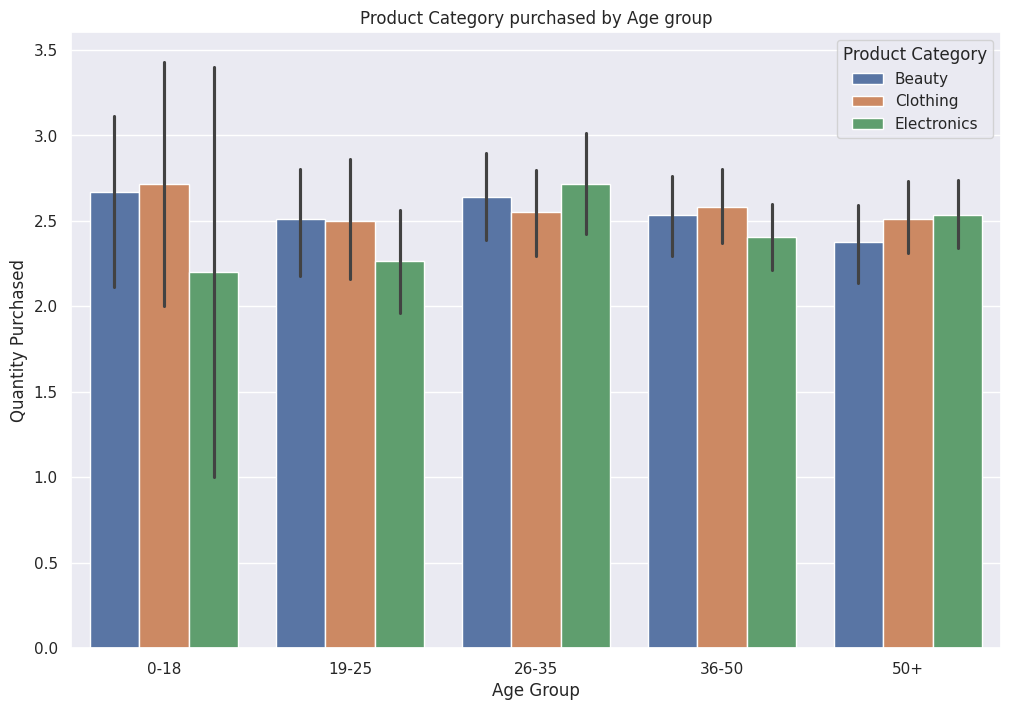

In [ ]:
# bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Quantity', hue= 'Product Category', data=data)
plt.title('Product Category purchased by Age group')
plt.xlabel('Age Group')
plt.ylabel('Quantity Purchased')
plt.show()

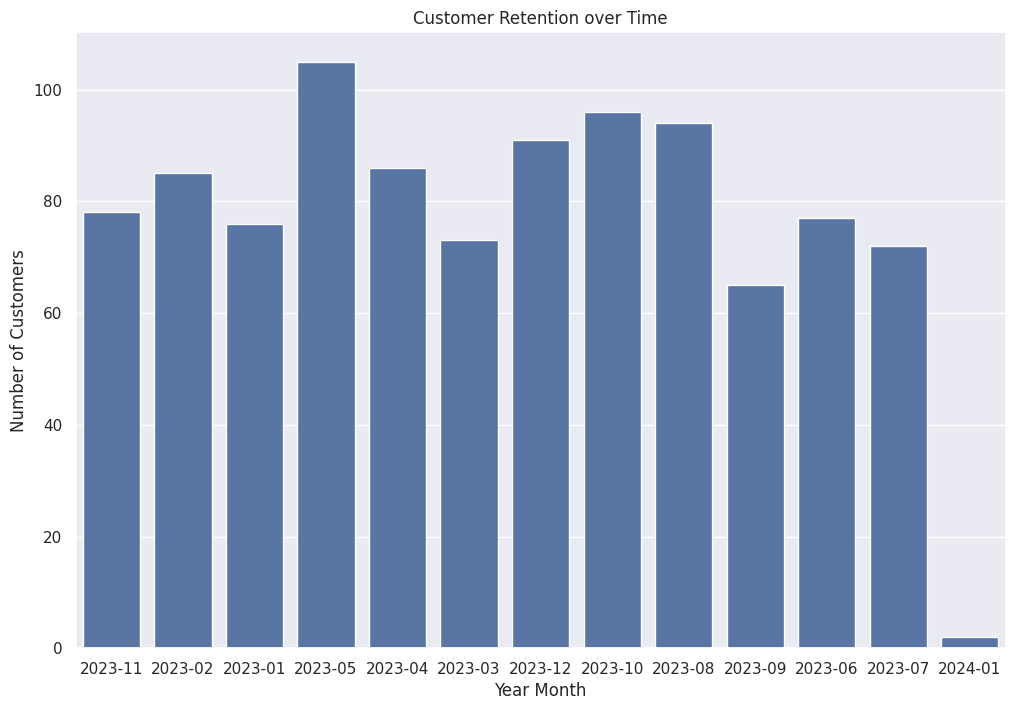

In [ ]:
#Showing Customer Retention over Time
retention = data.groupby('Customer ID')['Date'].min().reset_index()
retention['Year Month'] = retention['Date'].dt.to_period('M')

plt.figure(figsize=(12,8))
sns.countplot(x='Year Month', data= retention)
plt.title('Customer Retention over Time')
plt.xlabel('Year Month')
plt.ylabel('Number of Customers')
plt.show()

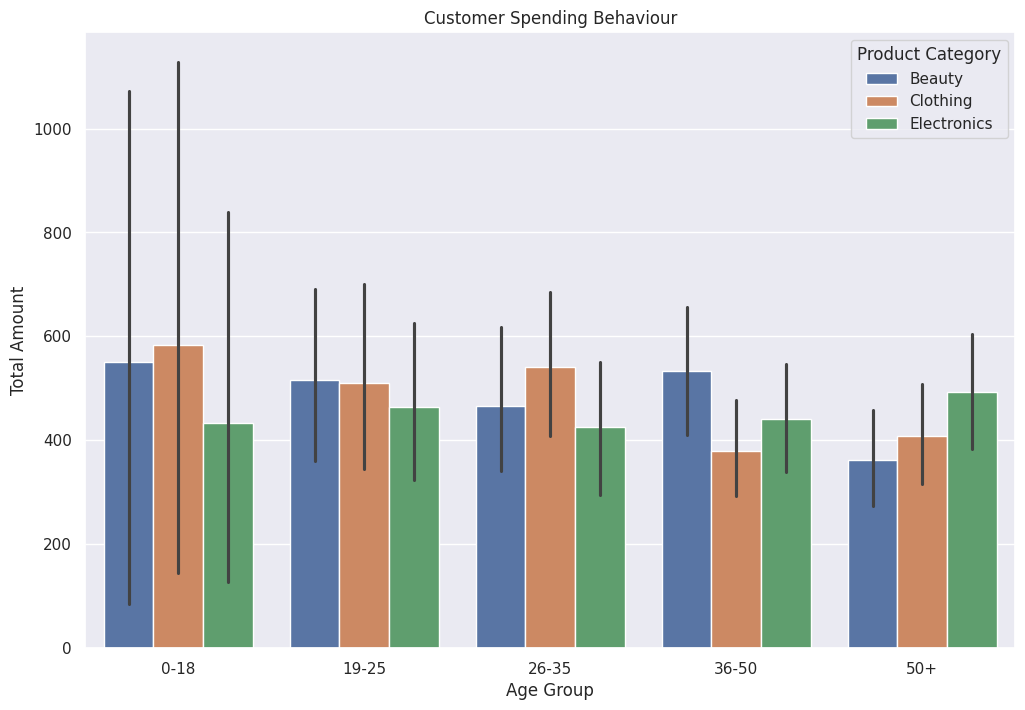

In [ ]:
#Analyzing Customer Spending Behaviour
plt.figure(figsize=(12,8))
sns.barplot(x='Age Group', y='Total Amount', hue='Product Category', data=data)
plt.title('Customer Spending Behaviour')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()